In [134]:
import numpy as np
import cv2 #used resize function
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import torch
import torchvision.transforms.functional as TF

#### Rotation and Flip

In [172]:
image_paths = './samples/sample1.jpg'
image = Image.open(image_paths)

In [173]:
def randFlip(image, probability=0.5):
    r = np.random.rand()
    if r < probability:
        img_flipped = np.fliplr(image)
        return img_flipped
    else:
        return image

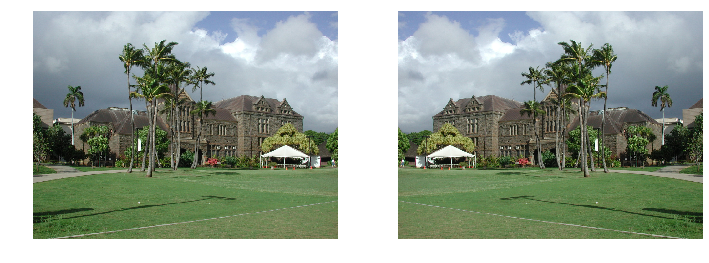

In [174]:
flipped = randFlip(image)
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

fig.add_subplot(1,2,2)
plt.imshow(flipped)
plt.axis("off")
plt.show();
fig.savefig("flip.jpg")

In [149]:
image_paths = './samples/sample4.jpg'
image = Image.open(image_paths)

In [150]:
# random rotate
def rotate90(image):
    angle = 90 * np.random.randint(-1, 2, (1,))
    rotated = TF.rotate(image, angle)
    return rotated

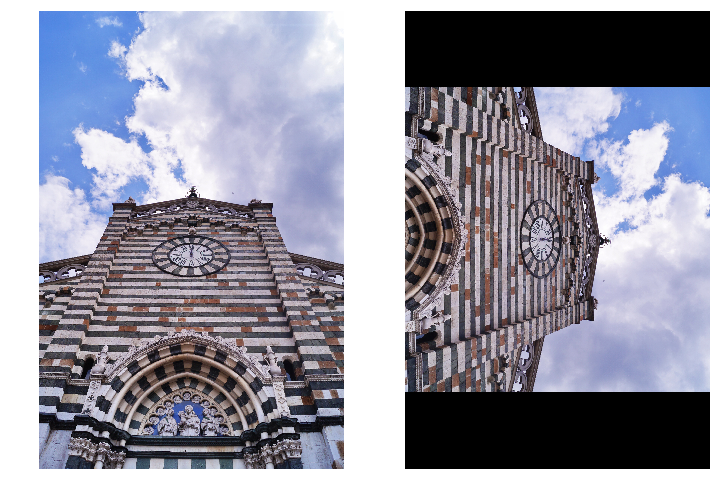

In [152]:
rotated = rotate90(image)
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

fig.add_subplot(1,2,2)
plt.imshow(rotated)
plt.axis("off")
plt.show();
fig.savefig("rotation.jpg")

#### Perspective

In [153]:
def randPerspective(image, scale=0.1):
    
    width, height = image.size
    dh, dw = int(scale*height), int(scale*width)
    corner0 = (np.random.randint(0, dh), np.random.randint(0, dh))
    corner1 = (np.random.randint(width - dw - 1, width - 1), np.random.randint(0, dh))
    corner2 = (np.random.randint(width -dw -1, width - 1), np.random.randint(height-dh-1, height-1))
    corner3 = (np.random.randint(0, dw), np.random.randint(height - dh -1, height-1))
    startpoints = np.array([(0, 0), (width - 1, 0), (width - 1, height - 1), (0, height - 1)], dtype=np.float32)
    endpoints = np.array([corner0, corner1, corner2, corner3], dtype=np.float32)

    perspective = TF.perspective(image, startpoints, endpoints)
    return perspective

In [154]:
image_paths = './samples/sample6.jpg'
image = Image.open(image_paths)

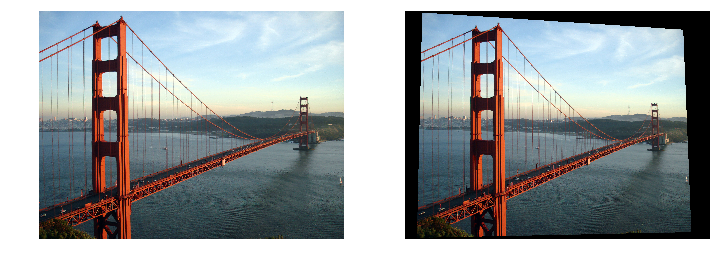

In [155]:
# perspective.save('perspective.jpg')
scale = 0.1
perspect = randPerspective(image, scale)
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

fig.add_subplot(1,2,2)
plt.imshow(perspect)
plt.axis("off")
plt.show();
fig.savefig("perspective.jpg")

#### Crop and Zoom

In [156]:
def randCrop(image, scale_range=(0.3, 0.5)):
    code = np.random.randint(0, 5)
    scale = np.random.uniform (scale_range[0], scale_range[1])
    width, height = image.size
    
    img_crop = np.array(image)
    
    if code == 0:
        img_crop = img_crop[int(height*scale):, :, :]
    
    elif code == 1:
        img_crop = img_crop[0:int(-height*scale), :, :]
    
    elif code == 2:
        img_crop = img_crop[:,int(width*scale):, :]
    
    elif code == 3:
        img_crop = img_crop[:, 0:int(-width*scale), :]
    
    # Upsample to original shape
    img_crop = cv2.resize(img_crop, (width, height))
    
    return img_crop

In [157]:
image_paths = './samples/sample2.jpg'
image = Image.open(image_paths)

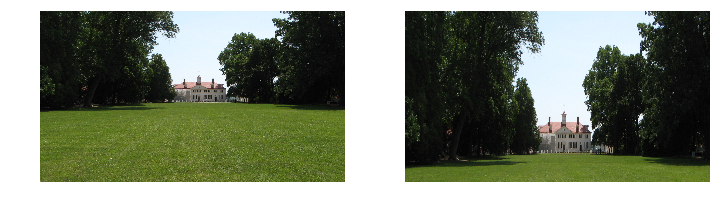

In [158]:
temp = randCrop(image)
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

fig.add_subplot(1,2,2)
plt.imshow(temp)
plt.axis("off")
plt.show();
fig.savefig("crop.jpg")

#### Color

In [165]:
def randBrightness(image, scale_range=(0.5, 1.5)):
    brightness = np.random.uniform(scale_range[0], scale_range[1])
    jitter = brightness * np.array(image).astype(np.float32)
    jitter = np.clip(jitter, 0, 255).astype(np.uint8)
    jittered = Image.fromarray(jitter)
    return jittered

In [166]:
image_paths = './samples/sample3.jpg'
image = Image.open(image_paths)

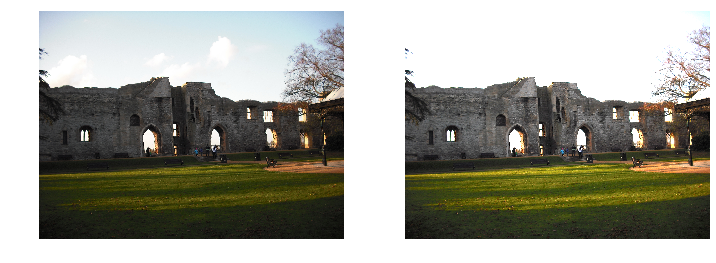

In [168]:
jittered = randBrightness(image, (1, 1.7))

fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

fig.add_subplot(1,2,2)
plt.imshow(jittered)
plt.axis("off")
plt.show();
fig.savefig("brightness.jpg")

#### Noise

In [198]:
def block(image, scale=0.1, p=0.1):

    width, height=image.size
    w, h = int(scale*width), int(scale*height)
    mask = np.random.rand(w, h)
    mask = mask > p
    mask = cv2.resize(mask.astype(np.uint8), (width, height), interpolation=0)
    
    blocked = np.stack([mask, mask, mask], axis=2) * np.array(image)
    return blocked

In [199]:
image_paths = './samples/sample5.jpg'
image = Image.open(image_paths)

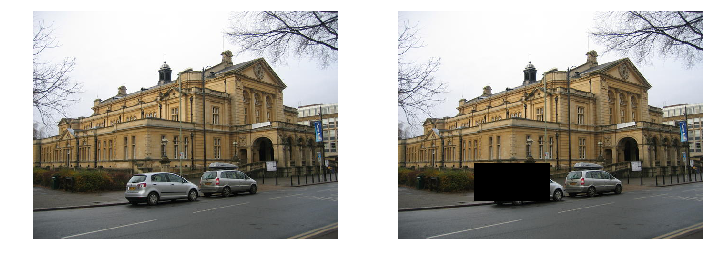

In [200]:
scale=0.01
p=0.05
blocked = block(image, scale, p)

fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")

fig.add_subplot(1,2,2)
plt.imshow(blocked)
plt.axis("off")
plt.show();
fig.savefig("block.jpg")

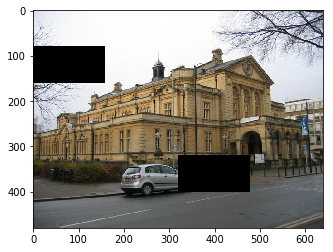

In [202]:
scale=0.01
p=0.1
blocked = block(image, scale, p)
plt.imshow(blocked)

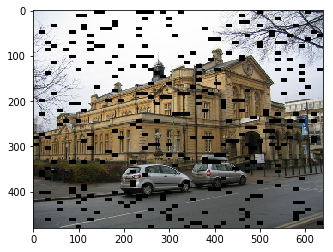

In [203]:
scale=0.1
p=0.1
blocked = block(image, scale, p)
plt.imshow(blocked)